In [1]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize



from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [2]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [4]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
qualy = 'Q'
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 21
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: RUS
Piloto 2: HAM


In [5]:
# Cargar la carrera y clasificación
race = ff1.get_session(year, wknd, ses)
quali = ff1.get_session(year, wknd, qualy)

In [6]:
# Get the laps
laps_r = race.load(telemetry=True)
laps_q = quali.load(telemetry=True)

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '55', '16', '14', '1', '11', '31', '77', '18', '5', '24', '47', '10', '23', '6', '22', '4', '20', '3']
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for t

In [7]:
fastest_lap = race.laps.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:13.785000
Tipo de neumático:  SOFT
Piloto:  RUS


In [8]:
fastest_lap

Time                      0 days 02:27:58.189000
DriverNumber                                  63
LapTime                   0 days 00:01:13.785000
LapNumber                                   61.0
Stint                                        3.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:18.998000
Sector2Time               0 days 00:00:37.660000
Sector3Time               0 days 00:00:17.127000
Sector1SessionTime        0 days 02:27:03.402000
Sector2SessionTime        0 days 02:27:41.062000
Sector3SessionTime        0 days 02:27:58.189000
SpeedI1                                    291.0
SpeedI2                                    252.0
SpeedFL                                    297.0
SpeedST                                    299.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                    21.0
FreshTyre           

In [18]:
tm = race.get_driver(driver1).TeamName
tm = tm.lower().replace(" ", "")

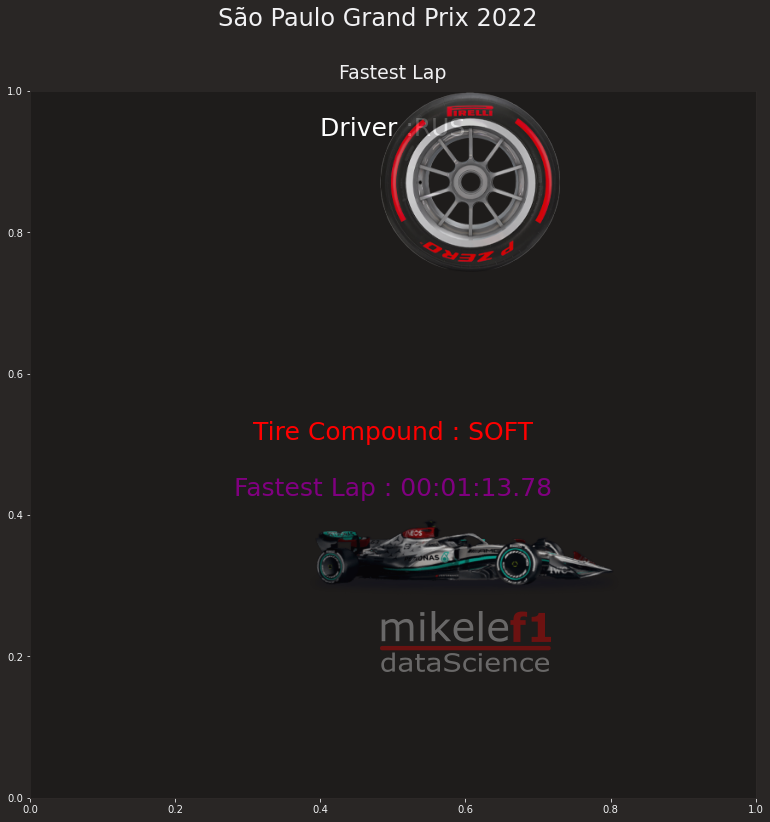

In [23]:
import matplotlib
import matplotlib.pyplot as plt


with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

car = image.imread('./images/'+tm+'.png')
res = resize(car, (97, 329))

fig = plt.figure()
ax = fig.add_subplot()
#fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
if ses == 'Q':
    ax.set_title('Pole Position')
else :
    ax.set_title('Fastest Lap')

plt.rcParams['figure.figsize'] = [13, 13]

plt.suptitle(f"{race.event['EventName']} {race.event.year} \n"
             , size=24, y=0.97)

ax.text(0.50, 0.50, 'Tire Compound : '+fastest_lap['Compound'] ,
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='red', fontsize=25)

ax.text(0.50, 0.42, 'Fastest Lap :' + str(fastest_lap['LapTime'])[6:18],
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='purple', fontsize=25)

ax.text(0.50, 0.93, 'Driver :' + fastest_lap['Driver'],
        verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=25)

#ax.plot([2], [1], 'o')
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#            arrowprops=dict(facecolor='black', shrink=0.05))

tire = image.imread('./images/red.png')
tire = resize(tire, (180, 180))
fig.figimage(tire, xo=380, yo=550, origin='upper', alpha=.80)

fig.figimage(im, xo=380, yo=150, zorder=13, alpha=.35)
fig.figimage(res, xo=300, yo=220, origin='upper', alpha=.80)

nombrearchivo = str(year)+'-'+str(wknd)+'-Pole-Q-'+fastest_lap['Driver']+'.png'
plt.savefig(nombrearchivo)


plt.show()

In [17]:
laps_drive1 = race.laps.pick_driver(driver1)
laps_drive2 = race.laps.pick_driver(driver2)

In [11]:
laps_drive1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:15.105000,63,NaT,1.0,1.0,0 days 00:24:38.387000,NaT,NaT,0 days 00:00:38.679000,0 days 00:00:27.120000,...,False,SOFT,1.0,True,0 days 01:01:46.277000,Mercedes,RUS,24,False,2022-11-13 18:02:47.303
1,0 days 01:05:11.451000,63,0 days 00:01:56.346000,2.0,1.0,NaT,NaT,0 days 00:00:25.002000,0 days 00:01:03.831000,0 days 00:00:27.513000,...,False,SOFT,2.0,True,0 days 01:03:15.105000,Mercedes,RUS,4,False,2022-11-13 18:04:16.131
2,0 days 01:07:11.417000,63,0 days 00:01:59.966000,3.0,1.0,NaT,NaT,0 days 00:00:30.536000,0 days 00:01:01.643000,0 days 00:00:27.787000,...,False,SOFT,3.0,True,0 days 01:05:11.451000,Mercedes,RUS,4,False,2022-11-13 18:06:12.477
3,0 days 01:09:10.651000,63,0 days 00:01:59.234000,4.0,1.0,NaT,NaT,0 days 00:00:30.408000,0 days 00:01:01.326000,0 days 00:00:27.500000,...,False,SOFT,4.0,True,0 days 01:07:11.417000,Mercedes,RUS,4,False,2022-11-13 18:08:12.443
4,0 days 01:11:05.080000,63,0 days 00:01:54.429000,5.0,1.0,NaT,NaT,0 days 00:00:31.450000,0 days 00:00:57.329000,0 days 00:00:25.650000,...,False,SOFT,5.0,True,0 days 01:09:10.651000,Mercedes,RUS,4,False,2022-11-13 18:10:11.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0 days 02:35:22.341000,63,0 days 00:01:14.314000,67.0,3.0,NaT,NaT,0 days 00:00:19.111000,0 days 00:00:37.889000,0 days 00:00:17.314000,...,False,SOFT,27.0,None,0 days 02:34:08.027000,Mercedes,RUS,1,True,2022-11-13 19:35:09.053
67,0 days 02:36:36.721000,63,0 days 00:01:14.380000,68.0,3.0,NaT,NaT,0 days 00:00:19.064000,0 days 00:00:37.962000,0 days 00:00:17.354000,...,False,SOFT,28.0,None,0 days 02:35:22.341000,Mercedes,RUS,1,True,2022-11-13 19:36:23.367
68,0 days 02:37:51.181000,63,0 days 00:01:14.460000,69.0,3.0,NaT,NaT,0 days 00:00:19.108000,0 days 00:00:37.995000,0 days 00:00:17.357000,...,False,SOFT,29.0,None,0 days 02:36:36.721000,Mercedes,RUS,1,True,2022-11-13 19:37:37.747
69,0 days 02:39:05.696000,63,0 days 00:01:14.515000,70.0,3.0,NaT,NaT,0 days 00:00:19.095000,0 days 00:00:38.068000,0 days 00:00:17.352000,...,False,SOFT,30.0,None,0 days 02:37:51.181000,Mercedes,RUS,1,True,2022-11-13 19:38:52.207


In [11]:
laps_drive2

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
49,0 days 00:18:05.793000,63,NaT,1,1,0 days 00:16:42.378000,NaT,NaT,0 days 00:00:44.750000,0 days 00:00:18.782000,...,False,INTERMEDIATE,1.0,True,0 days 00:16:42.378000,Mercedes,RUS,1,False,2022-11-11 19:02:47.168
50,0 days 00:19:25.167000,63,0 days 00:01:19.374000,2,1,NaT,NaT,0 days 00:00:19.970000,0 days 00:00:41.409000,0 days 00:00:17.995000,...,False,INTERMEDIATE,2.0,True,0 days 00:18:05.793000,Mercedes,RUS,1,True,2022-11-11 19:04:10.583
51,0 days 00:21:09.204000,63,0 days 00:01:44.037000,3,1,NaT,NaT,0 days 00:00:25.714000,0 days 00:00:59.697000,0 days 00:00:18.626000,...,False,INTERMEDIATE,3.0,True,0 days 00:19:25.167000,Mercedes,RUS,1,True,2022-11-11 19:05:29.957
52,0 days 00:22:27.770000,63,0 days 00:01:18.566000,4,1,NaT,NaT,0 days 00:00:19.654000,0 days 00:00:40.879000,0 days 00:00:18.033000,...,False,INTERMEDIATE,4.0,True,0 days 00:21:09.204000,Mercedes,RUS,1,True,2022-11-11 19:07:13.994
53,0 days 00:24:10.079000,63,0 days 00:01:42.309000,5,1,NaT,NaT,0 days 00:00:24.577000,0 days 00:00:58.293000,0 days 00:00:19.439000,...,False,INTERMEDIATE,5.0,True,0 days 00:22:27.770000,Mercedes,RUS,1,True,2022-11-11 19:08:32.560
54,0 days 00:25:35.623000,63,0 days 00:01:25.544000,6,2,NaT,0 days 00:25:32.325000,0 days 00:00:19.559000,0 days 00:00:40.854000,0 days 00:00:25.131000,...,False,INTERMEDIATE,1.0,True,0 days 00:24:10.079000,Mercedes,RUS,1,False,2022-11-11 19:10:14.869
55,0 days 00:27:56.617000,63,0 days 00:02:20.994000,7,2,0 days 00:26:32.221000,NaT,0 days 00:01:16.319000,0 days 00:00:43.972000,0 days 00:00:20.703000,...,False,SOFT,2.0,True,0 days 00:25:35.623000,Mercedes,RUS,1,False,2022-11-11 19:11:40.413
56,0 days 00:29:13.597000,63,0 days 00:01:16.980000,8,2,NaT,NaT,0 days 00:00:19.518000,0 days 00:00:39.344000,0 days 00:00:18.118000,...,False,SOFT,3.0,True,0 days 00:27:56.617000,Mercedes,RUS,1,True,2022-11-11 19:14:01.407
57,0 days 00:30:28.646000,63,0 days 00:01:15.049000,9,2,NaT,NaT,0 days 00:00:19.201000,0 days 00:00:38.190000,0 days 00:00:17.658000,...,False,SOFT,4.0,True,0 days 00:29:13.597000,Mercedes,RUS,1,True,2022-11-11 19:15:18.387
58,0 days 00:31:43.073000,63,0 days 00:01:14.427000,10,2,NaT,NaT,0 days 00:00:18.823000,0 days 00:00:37.950000,0 days 00:00:17.654000,...,False,SOFT,5.0,True,0 days 00:30:28.646000,Mercedes,RUS,1,True,2022-11-11 19:16:33.436


In [12]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

26
24


In [13]:
piloto1 = race.get_driver(driver1)
piloto2 = race.get_driver(driver2)

In [14]:
d1_team = pd.unique(laps_drive1['Team'])
print(d1_team)

['Haas F1 Team']


In [15]:
color1 = ff1.plotting.driver_color(driver1)
color2 = ff1.plotting.driver_color(driver2)
#Si el gráfico es similar se pone otro color Blanco
#color2 = '#FFFFFF'

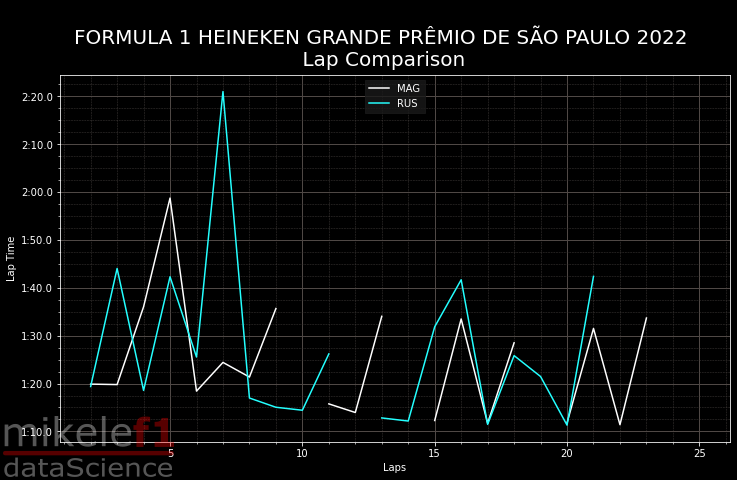

In [16]:
plt.rcParams['figure.figsize'] = [12, 12]
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

#Modo oscuro
plt.style.use('dark_background')


fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]


plt.suptitle(f"\n{race.event['OfficialEventName']} \n Lap Comparison \n"
             , size=20, y=1.02)

#fig, ax = plt.subplots()
#plt.suptitle(f"Lap Comparison \n "
#             f"{race.event['EventName']} {race.event.year} Race \n")
#             f"{piloto1['FullName']} &  {piloto2['FullName']} \n")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'], color = color1,  label=piloto1['Abbreviation'])
ax.plot(laps_drive2['LapNumber'], laps_drive2['LapTime'], color = color2 , label=piloto2['Abbreviation'])
ax.set(ylabel='Lap Time', xlabel='Laps')
ax.legend(loc="upper center")

fig.figimage(im, 3, 3, zorder=13, alpha=.35)

nombrearchivo = str(year)+'-'+str(wknd)+'-LC'+ses+'-'+driver1+'-'+driver2+'.png'
plt.savefig(nombrearchivo)
plt.show()